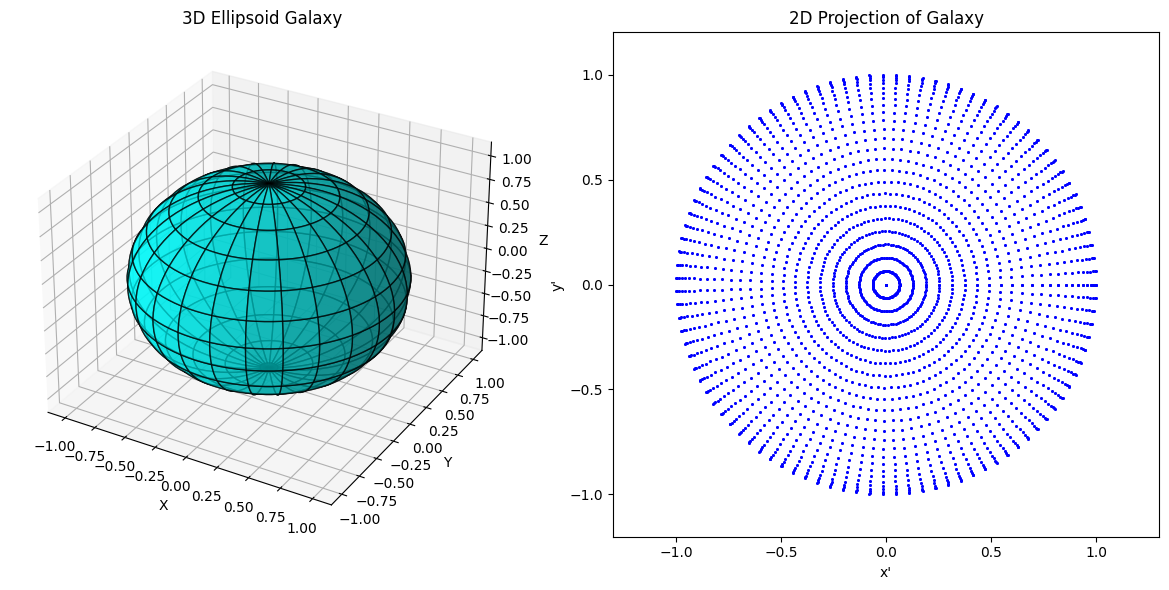

In [23]:
#this code snippet plot the 3-d ellipsoid(galaxy) and gives its 2-D projection based on the observers position
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rotation_matrix(theta, phi):
    """Construct the rotation matrix for given theta and phi."""
    R = np.array([
        [np.cos(phi), np.sin(phi) * np.cos(theta), -np.sin(phi) * np.sin(theta)],
        [-np.sin(phi), np.cos(phi) * np.cos(theta), np.cos(phi) * np.sin(theta)],
        [0, -np.sin(theta), np.cos(theta)]
    ])
    return R

def transform_coordinates(points, theta, phi):
    """Transform a set of points using the rotation matrix."""
    R = rotation_matrix(theta, phi)
    return np.dot(R, points.T).T

def set_axes_equal(ax):
    """Set 3D plot axes to have equal scale."""
    limits = np.array([ax.get_xlim(), ax.get_ylim(), ax.get_zlim()])
    center = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    ax.set_xlim(center[0] - radius, center[0] + radius)
    ax.set_ylim(center[1] - radius, center[1] + radius)
    ax.set_zlim(center[2] - radius, center[2] + radius)

# Example galaxy points (a simple ellipsoid)
a, b, c = 1, 1, 1 # change these according to your requirements

phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 50)
x = a * np.outer(np.cos(phi), np.sin(theta))
y = b * np.outer(np.sin(phi), np.sin(theta))
z = c * np.outer(np.ones_like(phi), np.cos(theta))

# Flatten the grid into points
points = np.array([x.flatten(), y.flatten(), z.flatten()]).T

# Observer angles [change these according to your requirements]
theta_obs = np.radians(0)  # Polar angle
phi_obs = np.radians(0)# Azimuthal angle

# Transform points to observer's frame
transformed_points = transform_coordinates(points, theta_obs, phi_obs)

# Extract the projection (set z' = 0)
projected_points = transformed_points[:, :2]

# Plot the original 3D ellipsoid
fig = plt.figure(figsize=(12, 6))

# 3D plot of the ellipsoid
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='cyan', alpha=0.7, edgecolor='k')
ax.set_title("3D Ellipsoid Galaxy")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
set_axes_equal(ax)  # Apply equal axis scaling for better visualization

# Plot the 2D projection
ax2 = fig.add_subplot(122)
ax2.scatter(projected_points[:, 0], projected_points[:, 1], s=1, c='blue')
ax2.set_title("2D Projection of Galaxy")
ax2.set_xlabel("x'")
ax2.set_ylabel("y'")
ax2.axis('equal')

plt.tight_layout()
plt.show()
